### Introduction

#### This is the DAMG 6105's Final Project of 


#### Chao Wang(NUID 0021955685)  &  Ling Li(NUID 002196505)

Housing price has been a popular topic that we are interested in. Especially during pandemic time, the housing price increases quickly according to large market demands. We are going to use the data we obtained from the redfin website to see what are the factors that influence housing prices and how. We are going to visualize correlations of them by using Pandas. Since our school is located in San Jose and we also live in this area, we would like to take this opportunity to analyse housing prices in Sunnyvale, Santa Clara, Cupertino, San Jose West, and Campbell. 


How do we clean our data?

We downloaded ten files from Redfin website for different cities, since San Jose doesn't have data when searching "San Jose", so we use zipcode to download 6 files for this city. in total we have data for 3500 houses. We deleted outliers, wrong value and missing value in all files first then combine then into one file. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns", None)

In [2]:
# I downloaded 10 dataframes from the redfin, there are they:
df1 = pd.read_csv('95117wsj.csv')
df2 = pd.read_csv('95118wsj.csv')
df3 = pd.read_csv('95130wsj.csv')
df4 = pd.read_csv('95124wsj.csv')
df5 = pd.read_csv('95128wsj.csv')
df6 = pd.read_csv('95129wsj.csv')
df7 = pd.read_csv('santa clara.csv')
df8 = pd.read_csv('campbell.csv')
df9 = pd.read_csv('cupertino.csv')
df10 = pd.read_csv('sunnyvale.csv')

# They are under the same format. Let's see one example of the dataframes.
df1.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,PAST SALE,June-26-2019,Townhouse,1331 Charmwood Sq,SAN JOSE,CA,95117,988000,2,2.0,SAN JOSE,1152,1440.0,1972,897.0,858,260.0,Sold,NaN,NaN,https://www.redfin.com/CA/San-Jose/1331-Charmw...,MLSListings,ML81754422,N,Y,37.300915,-121.960148
1,PAST SALE,April-20-2018,Townhouse,535 Boxleaf Ct,SAN JOSE,CA,95117,1091000,2,2.5,SAN JOSE,1117,3823.0,1985,1329.0,977,337.0,Sold,NaN,NaN,https://www.redfin.com/CA/San-Jose/535-Box-Lea...,MLSListings,ML81696890,N,Y,37.320737,-121.961721
2,PAST SALE,October-22-2021,Single Family Residential,3704 Rhoda Dr,SAN JOSE,CA,95117,1555000,3,2.0,SAN JOSE,1557,7024.0,1973,48.0,999,NaN,Sold,NaN,NaN,https://www.redfin.com/CA/San-Jose/3704-Rhoda-...,MLSListings,ML81859644,N,Y,37.304621,-121.966285
3,PAST SALE,April-27-2018,Single Family Residential,3306 Yuba Ave,SAN JOSE,CA,95117,1650000,4,2.0,SAN JOSE,2257,6900.0,1968,1322.0,731,NaN,Sold,NaN,NaN,https://www.redfin.com/CA/San-Jose/3306-Yuba-A...,MLSListings,ML81697073,N,Y,37.303358,-121.955554
4,PAST SALE,March-18-2020,Single Family Residential,1089 Phelps Ave,SAN JOSE,CA,95117,1635000,4,3.0,SAN JOSE,2199,6163.0,1962,631.0,744,NaN,Sold,NaN,NaN,https://www.redfin.com/CA/San-Jose/1089-Phelps...,MLSListings,ML81782870,N,Y,37.306858,-121.961286


In [3]:
# The dataframes df1,df2,df3,df4,df5,df6 are all about West San Jose.
# so I combine them together as redfinwsj
redfinwsj = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)
redfinwsj

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,PAST SALE,June-26-2019,Townhouse,1331 Charmwood Sq,SAN JOSE,CA,95117,988000,2,2.0,SAN JOSE,1152.0,1440.0,1972,897.0,858.0,260.0,Sold,NaN,NaN,https://www.redfin.com/CA/San-Jose/1331-Charmw...,MLSListings,ML81754422,N,Y,37.300915,-121.960148
1,PAST SALE,April-20-2018,Townhouse,535 Boxleaf Ct,SAN JOSE,CA,95117,1091000,2,2.5,SAN JOSE,1117.0,3823.0,1985,1329.0,977.0,337.0,Sold,NaN,NaN,https://www.redfin.com/CA/San-Jose/535-Box-Lea...,MLSListings,ML81696890,N,Y,37.320737,-121.961721
2,PAST SALE,October-22-2021,Single Family Residential,3704 Rhoda Dr,SAN JOSE,CA,95117,1555000,3,2.0,SAN JOSE,1557.0,7024.0,1973,48.0,999.0,NaN,Sold,NaN,NaN,https://www.redfin.com/CA/San-Jose/3704-Rhoda-...,MLSListings,ML81859644,N,Y,37.304621,-121.966285
3,PAST SALE,April-27-2018,Single Family Residential,3306 Yuba Ave,SAN JOSE,CA,95117,1650000,4,2.0,SAN JOSE,2257.0,6900.0,1968,1322.0,731.0,NaN,Sold,NaN,NaN,https://www.redfin.com/CA/San-Jose/3306-Yuba-A...,MLSListings,ML81697073,N,Y,37.303358,-121.955554
4,PAST SALE,March-18-2020,Single Family Residential,1089 Phelps Ave,SAN JOSE,CA,95117,1635000,4,3.0,SAN JOSE,2199.0,6163.0,1962,631.0,744.0,NaN,Sold,NaN,NaN,https://www.redfin.com/CA/San-Jose/1089-Phelps...,MLSListings,ML81782870,N,Y,37.306858,-121.961286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,PAST SALE,July-6-2018,Single Family Residential,1030 W Riverside Way,SAN JOSE,CA,95129,2262888,4,2.0,SAN JOSE,1246.0,7924.0,1956,1252.0,1816.0,NaN,Sold,NaN,NaN,https://www.redfin.com/CA/San-Jose/1030-W-Rive...,MLSListings,ML81707862,N,Y,37.309076,-122.022544
2096,PAST SALE,July-17-2017,Single Family Residential,6722 Bollinger Rd,SAN JOSE,CA,95129,1681320,4,2.0,SAN JOSE,1318.0,7434.0,1956,1606.0,1276.0,NaN,Sold,NaN,NaN,https://www.redfin.com/CA/San-Jose/6722-Bollin...,MLSListings,ML81655357,N,Y,37.309236,-122.022011
2097,PAST SALE,July-17-2017,Single Family Residential,6650 Bollinger Rd,SAN JOSE,CA,95129,1830000,4,3.5,SAN JOSE,2571.0,8071.0,2011,1606.0,712.0,NaN,Sold,NaN,NaN,https://www.redfin.com/CA/San-Jose/6650-Bollin...,MLSListings,ML81649423,N,Y,37.309438,-122.020656
2098,PAST SALE,November-9-2021,Single Family Residential,1525 Crespi Dr,SAN JOSE,CA,95129,2070000,4,2.0,SAN JOSE,1396.0,7140.0,1957,30.0,1483.0,NaN,Sold,NaN,NaN,https://www.redfin.com/CA/San-Jose/1525-Crespi...,MLSListings,ML81864675,N,Y,37.295157,-121.991675


#### Data Cleaning

I plan to combine 10 csv document into one as the final data source of this project. However, before that, I have to delete the unnecessary column of each dataframes.

I choose to modify each dataframes now, instead of after combining all the dataframes to one.

It is because

Firstly, there are 2100 cases in West San Jose but 350 cases in each other city. Use the combination dataframe to calculate the outlier data can cause the wrong result.

Secondly, the housing price gap between cities: In one city where housing prices are normally higher than others, one house at an average price may be the outlier of another city.

#### 1. Delete the unnecessary column of each dataframes

I plan to combine 10 csv document into one as the final data source of this project. However, before that, I have to delete the unnecessary column of each dataframes.

I choose to modify each dataframes now, instead of after combining all the dataframes to one. 

It is because 

Firstly, there are 2100 cases in West San Jose but 350 cases in each other city. Use the combination dataframe to calculate the outlier data can cause the wrong result. 

Secondly, the housing price gap between cities: In one city where housing prices are normally higher than others, one house at an average price may be the outlier of another city.

In [4]:
redfinwsj.drop(columns=['SALE TYPE','URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)','ADDRESS','STATE OR PROVINCE','LOCATION','DAYS ON MARKET','NEXT OPEN HOUSE START TIME','NEXT OPEN HOUSE END TIME','SOURCE','MLS#','FAVORITE','INTERESTED','LATITUDE','LONGITUDE' ], inplace=True)
df7.drop(columns=['SALE TYPE','URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)','ADDRESS','STATE OR PROVINCE','LOCATION','DAYS ON MARKET','NEXT OPEN HOUSE START TIME','NEXT OPEN HOUSE END TIME','SOURCE','MLS#','FAVORITE','INTERESTED','LATITUDE','LONGITUDE' ], inplace=True)
df8.drop(columns=['SALE TYPE','URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)','ADDRESS','STATE OR PROVINCE','LOCATION','DAYS ON MARKET','NEXT OPEN HOUSE START TIME','NEXT OPEN HOUSE END TIME','SOURCE','MLS#','FAVORITE','INTERESTED','LATITUDE','LONGITUDE' ], inplace=True)
df9.drop(columns=['SALE TYPE','URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)','ADDRESS','STATE OR PROVINCE','LOCATION','DAYS ON MARKET','NEXT OPEN HOUSE START TIME','NEXT OPEN HOUSE END TIME','SOURCE','MLS#','FAVORITE','INTERESTED','LATITUDE','LONGITUDE' ], inplace=True)
df10.drop(columns=['SALE TYPE','URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)','ADDRESS','STATE OR PROVINCE','LOCATION','DAYS ON MARKET','NEXT OPEN HOUSE START TIME','NEXT OPEN HOUSE END TIME','SOURCE','MLS#','FAVORITE','INTERESTED','LATITUDE','LONGITUDE' ], inplace=True)

#### 2.Delete the wrong data

This could be a mistake that Redfin made. 
For example, when I searched with the filter “TH” “SFH”, it would still accidentally give me back the data about the condo. And If I used a filter about cities, it would also give me back information about cities that are not within my searching keywords.
I could not tell if the Redfin Team did this on purpose or not, because it could be a kind of advertisement that has a chance to let you look at some real estate that you never thought of  before. 

So we have to do the step 1 of data cleaning -- Delete the wrong data

Let us use the dataframe of West San Jose to see what are those wrong data.

In [5]:
redfinwsj['PROPERTY TYPE'].value_counts()

Single Family Residential    1874
Townhouse                     216
Condo/Co-op                     9
Multi-Family (5+ Unit)          1
Name: PROPERTY TYPE, dtype: int64

In [6]:
# drop the data which are about Condo/Co-op and Multi-Family (5+ Unit)
redfinwsj.drop(redfinwsj[(redfinwsj['PROPERTY TYPE'] == 'Condo/Co-op') | (redfinwsj['PROPERTY TYPE'] == 'Multi-Family (5+ Unit)')].index, inplace=True)
redfinwsj['PROPERTY TYPE'].value_counts()

Single Family Residential    1874
Townhouse                     216
Name: PROPERTY TYPE, dtype: int64

In [7]:
# The same mistakes happened in the column CITY as well.
# use the city west san jose as the example
redfinwsj['CITY'].value_counts()

SAN JOSE     1855
San Jose      203
LOS GATOS      11
CAMPBELL        9
SARATOGA        9
Los Gatos       2
SUNNYVALE       1
Name: CITY, dtype: int64

In [8]:
# First Step, I make 'San Jose' and 'SAN JOSE' combine to 'San Jose', ect.
# Here, we can see there are campbell and sunnyvale in the dataframe of West San Jose as well. 
# This may because the website put them to the wrong database.
# I would rather keep them. Because they are indeed two of the cities that we are researching.
redfinwsj.replace({"SAN JOSE": "San Jose","SUNNYVALE": "Sunnyvale","CAMPBELL": "Campbell"}, inplace=True)
redfinwsj['CITY'].value_counts()

San Jose     2058
LOS GATOS      11
SARATOGA        9
Campbell        9
Los Gatos       2
Sunnyvale       1
Name: CITY, dtype: int64

In [9]:
# Second Step, I filter five target city.
redfinwsj.drop(redfinwsj[(redfinwsj['CITY'] != 'San Jose') & (redfinwsj['CITY'] != 'Sunnyvale') & (redfinwsj['CITY'] != 'Santa Clara') & (redfinwsj['CITY'] != 'Cupertino') & (redfinwsj['CITY'] != 'Campbell')].index, inplace=True)
redfinwsj['CITY'].value_counts()

San Jose     2058
Campbell        9
Sunnyvale       1
Name: CITY, dtype: int64

#### Now I repeat the above methods to other cities' dataframe

In [10]:
# santa clara
df7.replace({"SAN JOSE": "San Jose", "SANTA CLARA": "Santa Clara", "CUPERTINO": "Cupertino","SUNNYVALE": "Sunnyvale","CAMPBELL": "Campbell"}, inplace=True)
df7.drop(df7[(df7['CITY'] != 'San Jose') & (df7['CITY'] != 'Sunnyvale') & (df7['CITY'] != 'Santa Clara') & (df7['CITY'] != 'Cupertino') & (df7['CITY'] != 'Campbell')].index, inplace=True)
df7['CITY'].value_counts()

Santa Clara    329
San Jose        11
Sunnyvale        8
Cupertino        2
Name: CITY, dtype: int64

In [11]:
# campbell
df8.replace({"SAN JOSE": "San Jose", "SANTA CLARA": "Santa Clara", "CUPERTINO": "Cupertino","SUNNYVALE": "Sunnyvale","CAMPBELL": "Campbell"}, inplace=True)
df8.drop(df8[(df8['CITY'] != 'San Jose') & (df8['CITY'] != 'Sunnyvale') & (df8['CITY'] != 'Santa Clara') & (df8['CITY'] != 'Cupertino') & (df8['CITY'] != 'Campbell')].index, inplace=True)
df8['CITY'].value_counts()

Campbell    275
San Jose     45
Name: CITY, dtype: int64

In [12]:
#cupertino
df9.replace({"SAN JOSE": "San Jose", "SANTA CLARA": "Santa Clara", "CUPERTINO": "Cupertino","SUNNYVALE": "Sunnyvale","CAMPBELL": "Campbell"}, inplace=True)
df9.drop(df9[(df9['CITY'] != 'San Jose') & (df9['CITY'] != 'Sunnyvale') & (df9['CITY'] != 'Santa Clara') & (df9['CITY'] != 'Cupertino') & (df9['CITY'] != 'Campbell')].index, inplace=True)
df9['CITY'].value_counts()

Cupertino    303
Sunnyvale     21
San Jose      10
Name: CITY, dtype: int64

In [13]:
#sunnyvale
df10.replace({"SAN JOSE": "San Jose", "SANTA CLARA": "Santa Clara", "CUPERTINO": "Cupertino","SUNNYVALE": "Sunnyvale","CAMPBELL": "Campbell"}, inplace=True)
df10.drop(df10[(df10['CITY'] != 'San Jose') & (df10['CITY'] != 'Sunnyvale') & (df10['CITY'] != 'Santa Clara') & (df10['CITY'] != 'Cupertino') & (df10['CITY'] != 'Campbell')].index, inplace=True)
df10['CITY'].value_counts()

Sunnyvale      324
Cupertino       12
Santa Clara      7
Name: CITY, dtype: int64

#### 3. delete the outlier data

In [14]:
# kickoff outliers in the west san jose
redfin6 = redfinwsj[["PRICE", "BEDS","BATHS","SQUARE FEET","LOT SIZE"]]
redfin7 = redfin6.dropna()
from scipy import stats
z = np.abs(stats.zscore(redfin7))
threshold = 3
redfin8 = redfin7[(z < 3).all(axis=1)]
redfinwsj_new = redfinwsj.loc[redfin8.index]

redfinwsj_index = redfinwsj_new.reset_index(drop = True)
redfinwsj_index

,SOLD DATE,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,STATUS
0,June-26-2019,Townhouse,San Jose,95117,988000,2,2.0,1152.0,1440.0,1972,858.0,260.0,Sold
1,April-20-2018,Townhouse,San Jose,95117,1091000,2,2.5,1117.0,3823.0,1985,977.0,337.0,Sold
2,October-22-2021,Single Family Residential,San Jose,95117,1555000,3,2.0,1557.0,7024.0,1973,999.0,NaN,Sold
3,April-27-2018,Single Family Residential,San Jose,95117,1650000,4,2.0,2257.0,6900.0,1968,731.0,NaN,Sold
4,March-18-2020,Single Family Residential,San Jose,95117,1635000,4,3.0,2199.0,6163.0,1962,744.0,NaN,Sold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,July-6-2018,Single Family Residential,San Jose,95129,2262888,4,2.0,1246.0,7924.0,1956,1816.0,NaN,Sold
1981,July-17-2017,Single Family Residential,San Jose,95129,1681320,4,2.0,1318.0,7434.0,1956,1276.0,NaN,Sold
1982,July-17-2017,Single Family Residential,San Jose,95129,1830000,4,3.5,2571.0,8071.0,2011,712.0,NaN,Sold
1983,November-9-2021,Single Family Residential,San Jose,95129,2070000,4,2.0,1396.0,7140.0,1957,1483.0,NaN,Sold


In [15]:
# kickoff outliers in the santa clara

redfin9 = df7[["PRICE", "BEDS","BATHS","SQUARE FEET","LOT SIZE"]]
redfin10 = redfin9.dropna()
from scipy import stats
z = np.abs(stats.zscore(redfin10))
threshold = 3
redfin11 = redfin10[(z < 3).all(axis=1)]
df7_new = df7.loc[redfin11.index]

df7_index = df7_new.reset_index(drop = True)
df7_index

,SOLD DATE,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,STATUS
0,NaN,Single Family Residential,Santa Clara,95051,1655000,4,2.0,1288,6300.0,1968.0,1285,NaN,NaN
1,October-10-2017,Single Family Residential,Santa Clara,95051,1080000,3,2.0,1316,5600.0,1954.0,821,NaN,Sold
2,October-5-2018,Single Family Residential,Santa Clara,95054,1182375,4,2.0,1466,7618.0,1961.0,807,NaN,Sold
3,August-15-2018,Single Family Residential,Santa Clara,95051,1410000,3,2.0,1095,5983.0,1958.0,1288,NaN,Sold
4,October-28-2019,Townhouse,Santa Clara,95054,1080000,3,2.5,1400,1470.0,1973.0,771,355.0,Sold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,November-2-2018,Single Family Residential,Santa Clara,95050,1455000,3,2.0,1640,5565.0,1948.0,887,NaN,Sold
328,December-6-2019,Townhouse,Santa Clara,95054,730000,2,2.5,1300,653.0,1979.0,562,410.0,Sold
329,October-26-2021,Single Family Residential,Santa Clara,95050,1175000,3,1.0,1224,5767.0,1954.0,960,NaN,Sold
330,July-10-2017,Townhouse,Santa Clara,95051,958000,3,2.0,1311,1608.0,1972.0,731,265.0,Sold


In [16]:
# kickoff outliers in the campbell

redfin12 = df8[["PRICE", "BEDS","BATHS","SQUARE FEET","LOT SIZE"]]
redfin13 = redfin12.dropna()
from scipy import stats
z = np.abs(stats.zscore(redfin13))
threshold = 3
redfin14 = redfin13[(z < 3).all(axis=1)]
df8_new = df8.loc[redfin14.index]

df8_index = df8_new.reset_index(drop = True)
df8_index

,SOLD DATE,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,STATUS
0,May-6-2019,Single Family Residential,Campbell,95008,1925000,4,3.0,2054.0,6587.0,2018,937.0,NaN,Sold
1,September-3-2020,Single Family Residential,Campbell,95008,1425000,4,3.0,1591.0,6076.0,1961,896.0,NaN,Sold
2,July-24-2020,Single Family Residential,Campbell,95008,1430000,3,2.0,1478.0,6037.0,1961,968.0,NaN,Sold
3,June-25-2020,Single Family Residential,San Jose,95128,1221250,3,2.0,1222.0,9095.0,1950,999.0,NaN,Sold
4,April-16-2020,Single Family Residential,Campbell,95008,1301000,3,2.0,1176.0,6929.0,1955,1106.0,NaN,Sold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,May-23-2017,Single Family Residential,San Jose,95130,1448000,3,2.0,1204.0,6148.0,1964,1203.0,NaN,Sold
301,January-4-2017,Single Family Residential,San Jose,95130,1200000,3,2.0,1087.0,6042.0,1963,1104.0,NaN,Sold
302,September-27-2021,Townhouse,Campbell,95008,1000000,2,2.0,1018.0,3520.0,1964,982.0,342.0,Sold
303,May-27-2021,Single Family Residential,Campbell,95008,1920000,4,2.0,1841.0,6016.0,1971,1043.0,NaN,Sold


In [17]:
# kickoff outliers in the cupertino

redfin15 = df9[["PRICE", "BEDS","BATHS","SQUARE FEET","LOT SIZE"]]
redfin16 = redfin15.dropna()
from scipy import stats
z = np.abs(stats.zscore(redfin16))
threshold = 3
redfin17 = redfin16[(z < 3).all(axis=1)]
df9_new = df9.loc[redfin17.index]

df9_index = df9_new.reset_index(drop = True)
df9_index


,SOLD DATE,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,STATUS
0,July-10-2018,Single Family Residential,San Jose,95129,2380000,5,3.0,2239,6000.0,1967,1063,NaN,Sold
1,March-23-2020,Single Family Residential,Cupertino,95014,2660000,4,3.5,2243,6035.0,2012,1186,NaN,Sold
2,July-26-2021,Single Family Residential,Cupertino,95014,2830000,4,2.5,2394,7497.0,1968,1182,NaN,Sold
3,April-17-2018,Single Family Residential,Cupertino,95014,2798000,4,2.5,2310,7200.0,1962,1211,NaN,Sold
4,May-31-2017,Single Family Residential,Cupertino,95014,1860000,3,2.5,1724,6804.0,1966,1079,NaN,Sold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,August-25-2017,Townhouse,Cupertino,95014,1536000,3,2.5,1523,1641.0,1995,1009,150.0,Sold
314,November-21-2017,Townhouse,Cupertino,95014,1665000,3,2.0,1640,1440.0,1990,1015,305.0,Sold
315,July-6-2018,Townhouse,Cupertino,95014,1680000,3,2.5,1704,1480.0,1990,986,305.0,Sold
316,April-9-2021,Single Family Residential,Sunnyvale,94087,2110000,4,2.0,1685,7956.0,1957,1252,NaN,Sold


In [18]:
#kickoff outliers in the sunnyvale

redfin18 = df10[["PRICE", "BEDS","BATHS","SQUARE FEET","LOT SIZE"]]
redfin19 = redfin18.dropna()
from scipy import stats
z = np.abs(stats.zscore(redfin19))
threshold = 3
redfin20 = redfin19[(z < 3).all(axis=1)]
df10_new = df10.loc[redfin20.index]

df10_index = df10_new.reset_index(drop = True)
df10_index

,SOLD DATE,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,STATUS
0,November-29-2021,Townhouse,Sunnyvale,94086,1230000,2.0,2.5,1553.0,1.0,1991.0,792.0,505.0,Sold
1,September-8-2021,Single Family Residential,Sunnyvale,94086,2500000,3.0,2.5,1688.0,4964.0,2000.0,1481.0,NaN,Sold
2,February-17-2017,Townhouse,Sunnyvale,94085,849000,2.0,2.5,1277.0,867.0,2006.0,665.0,235.0,Sold
3,May-14-2018,Single Family Residential,Sunnyvale,94086,1700000,3.0,2.0,1200.0,5187.0,1944.0,1417.0,NaN,Sold
4,October-15-2020,Single Family Residential,Sunnyvale,94089,1300000,3.0,2.0,1108.0,6300.0,1958.0,1173.0,NaN,Sold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,October-31-2017,Single Family Residential,Sunnyvale,94087,1900000,4.0,2.0,1359.0,6000.0,1954.0,1398.0,NaN,Sold
313,April-10-2018,Single Family Residential,Sunnyvale,94087,2260000,3.0,2.0,1275.0,6000.0,1954.0,1773.0,NaN,Sold
314,March-24-2017,Single Family Residential,Sunnyvale,94087,1910000,3.0,2.0,1550.0,6000.0,1954.0,1232.0,NaN,Sold
315,April-7-2020,Single Family Residential,Sunnyvale,94087,2037000,4.0,2.0,1371.0,7397.0,1955.0,1486.0,NaN,Sold


In [19]:
# combine those outliered dataframes into one
combine = pd.concat([df10_index,df9_index, df8_index, df7_index, redfinwsj_index], ignore_index=True)
combine

redfin_new = combine.reset_index(drop = True)
print("There are " + str(len(redfin_new)) + " cases to be used in this research.")

There are 3257 cases to be used in this research.


In [20]:
# This is the dataframe that we use to do this project.
redfin_new.head()

,SOLD DATE,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,STATUS
0,November-29-2021,Townhouse,Sunnyvale,94086,1230000,2.0,2.5,1553.0,1.0,1991.0,792.0,505.0,Sold
1,September-8-2021,Single Family Residential,Sunnyvale,94086,2500000,3.0,2.5,1688.0,4964.0,2000.0,1481.0,NaN,Sold
2,February-17-2017,Townhouse,Sunnyvale,94085,849000,2.0,2.5,1277.0,867.0,2006.0,665.0,235.0,Sold
3,May-14-2018,Single Family Residential,Sunnyvale,94086,1700000,3.0,2.0,1200.0,5187.0,1944.0,1417.0,NaN,Sold
4,October-15-2020,Single Family Residential,Sunnyvale,94089,1300000,3.0,2.0,1108.0,6300.0,1958.0,1173.0,NaN,Sold


 ###  Covid and House Pricing
 
 #### Question 1. Does the housing pricing grow faster during the Covid?
 
 steps to research this question:
 1. calculate monthly sold housing of 12 months from 2017 to 2021.
 2. devided the above result by 5, to get the average housing market performance according to different months.
 3. draw a pic, to directly see the change between average of 5 years performance and the performance of 2021.


In [21]:
#Delete the data when the column SOLD DATE is missing values
redfin = redfin_new.dropna(subset=["SOLD DATE"])

In [22]:
# Which month is the hottest month in the housing market? 
# Which month is the most deserted?

J = redfin[redfin['SOLD DATE'].str.contains("January", regex=False)]
print("January " + str(len(J.index)))
F = redfin[redfin['SOLD DATE'].str.contains("February", regex=False)]
print("February " + str(len(F.index)))
Mar = redfin[redfin['SOLD DATE'].str.contains("March", regex=False)]
print("March " + str(len(Mar.index)))
Apr = redfin[redfin['SOLD DATE'].str.contains("April", regex=False)]
print("April " + str(len(Apr.index)))
May = redfin[redfin['SOLD DATE'].str.contains("May", regex=False)]
print("May " + str(len(May.index)))
June = redfin[redfin['SOLD DATE'].str.contains("June", regex=False)]
print("June " + str(len(June.index)))
July = redfin[redfin['SOLD DATE'].str.contains("July", regex=False)]
print("July " + str(len(July.index)))
August = redfin[redfin['SOLD DATE'].str.contains("August", regex=False)]
print("August " + str(len(August.index)))
Sep = redfin[redfin['SOLD DATE'].str.contains("September", regex=False)]
print("September " + str(len(Sep.index)))
Oct = redfin[redfin['SOLD DATE'].str.contains("October", regex=False)]
print("October " + str(len(Oct.index)))
Nov = redfin[redfin['SOLD DATE'].str.contains("November", regex=False)]
print("November " + str(len(Nov.index)))
Dec = redfin[redfin['SOLD DATE'].str.contains("December", regex=False)]
print("December " + str(len(Dec.index)))

January 113
February 129
March 247
April 287
May 270
June 263
July 300
August 315
September 257
October 293
November 253
December 207


#### Seems like the August is the hottest and the January is the deserted. However, the cases closed data is one month before the sold date. Thus, the July is the hottest and the December is the deserted. 

#### Thus, I would like to avoid these two months, in case the increase or decrease is due to the holiday or other effects. I choose April and October to do the research.

(-1.1089028742396427,
 1.1727900050927897,
 -1.4082115924624181,
 1.5306607063863875)

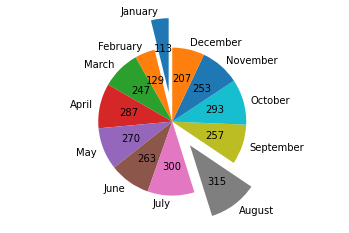

In [23]:
#Explode breaks a pie piece.
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
#number = [113, 129, 247, 287, 270, 263, 300, 315, 257, 293, 253, 207]
number = np.array([113, 129, 247, 287, 270, 263, 300, 315, 257, 293, 253, 207])

def absolute_value(val):
    a  = number[np.abs(number - val/100.*number.sum()).argmin()]
    return a

Explode = [0.4, 0, 0, 0, 0, 0, 0, 0.4, 0, 0, 0, 0]
plt.pie(number, explode = Explode, labels=months, autopct=absolute_value, startangle = 90)

# To show the percentage, autopct='%1.1f%%'

 # adjustes the size of the pie
plt.axis('equal')

2021 January  24
2021 February  30
2021 March  75
2021 April  80
2021 May  43
2021 June  58
2021 July  66
2021 August  84
2021 September  62
2021 October  76
2021 November  55
2021 December  10


Text(0.5, 0, 'Months')

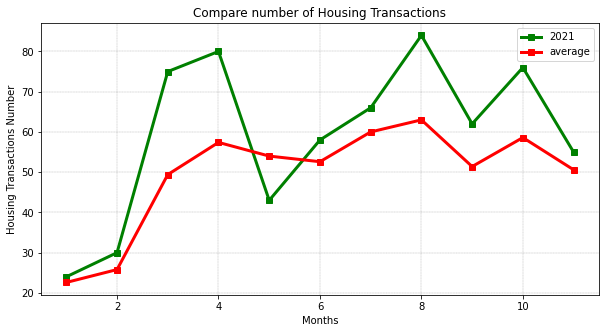

In [24]:
# 2021 

Y2021J = redfin[redfin['SOLD DATE'].str.contains("2021", regex=False) & redfin['SOLD DATE'].str.contains("January", regex=False)]
print("2021 January  " + str(len(Y2021J.index)))
Y2021F = redfin[redfin['SOLD DATE'].str.contains("2021", regex=False) & redfin['SOLD DATE'].str.contains("February", regex=False)]
print("2021 February  " + str(len(Y2021F.index)))
Y2021M = redfin[redfin['SOLD DATE'].str.contains("2021", regex=False) & redfin['SOLD DATE'].str.contains("March", regex=False)]
print("2021 March  " + str(len(Y2021M.index))) # The market started to boom
Y2021A = redfin[redfin['SOLD DATE'].str.contains("2021", regex=False) & redfin['SOLD DATE'].str.contains("April", regex=False)]
print("2021 April  " + str(len(Y2021A.index)))
Y2021May = redfin[redfin['SOLD DATE'].str.contains("2021", regex=False) & redfin['SOLD DATE'].str.contains("May", regex=False)]
print("2021 May  " + str(len(Y2021May.index)))
Y2021June = redfin[redfin['SOLD DATE'].str.contains("2021", regex=False) & redfin['SOLD DATE'].str.contains("June", regex=False)]
print("2021 June  " + str(len(Y2021June.index)))
Y2021July = redfin[redfin['SOLD DATE'].str.contains("2021", regex=False) & redfin['SOLD DATE'].str.contains("July", regex=False)]
print("2021 July  " + str(len(Y2021July.index)))
Y2021Au = redfin[redfin['SOLD DATE'].str.contains("2021", regex=False) & redfin['SOLD DATE'].str.contains("August", regex=False)]
print("2021 August  " + str(len(Y2021Au.index)))
Y2021Sep = redfin[redfin['SOLD DATE'].str.contains("2021", regex=False) & redfin['SOLD DATE'].str.contains("September", regex=False)]
print("2021 September  " + str(len(Y2021Sep.index)))
Y2021Oct = redfin[redfin['SOLD DATE'].str.contains("2021", regex=False) & redfin['SOLD DATE'].str.contains("October", regex=False)]
print("2021 October  " + str(len(Y2021Oct.index)))
Y2021No = redfin[redfin['SOLD DATE'].str.contains("2021", regex=False) & redfin['SOLD DATE'].str.contains("November", regex=False)]
print("2021 November  " + str(len(Y2021No.index)))
Y2021De = redfin[redfin['SOLD DATE'].str.contains("2021", regex=False) & redfin['SOLD DATE'].str.contains("December", regex=False)]
print("2021 December  " + str(len(Y2021De.index)))


y1 = np.array([len(Y2021J.index), len(Y2021F.index),len(Y2021M.index),len(Y2021A.index), len(Y2021May.index), len(Y2021June.index), len(Y2021July.index), len(Y2021Au.index), len(Y2021Sep.index), len(Y2021Oct.index), len(Y2021No.index)])
x1 = np.array([1,2,3,4,5,6,7,8,9,10,11])

y2 = np.array([len(J.index)/5, len(F.index)/5,len(Mar.index)/5, len(Apr.index)/5, len(May.index)/5, len(June.index)/5, len(July.index)/5, len(August.index)/5, len(Sep.index)/5, len(Oct.index)/5, len(Nov.index)/5])
x2 = np.array([1,2,3,4,5,6,7,8,9,10,11])

plt.figure(figsize=(10,5))
plt.plot(x1,y1,'ys-',linewidth=3, color = 'g', label='2021')
plt.plot(x2,y2,'ys-',linewidth=3, color = 'r', label='average')
plt.legend()
plt.grid(color='k', ls = '-.', lw = 0.15)
plt.title('Compare number of Housing Transactions')
plt.ylabel('Housing Transactions Number')
plt.xlabel('Months')

We can generally see that the trend of the data of April and October are similar.
except for May, but as I said before about the sold date and the closing date, actually it is April here. I actually googled what happened in April 2021 that might cause the sharp decline. But all the searching results pointed out that the performance of April should be fine.
So this might be because the data that Redfin gave missed part of the May data. 
However, we can still observe that in general, the performance of 2021 is better than the average performance of the 5 years.



#### After exploring the monthly performance, how about the yearly performance?


2017 545
2018 521
2019 562
2020 622
2021 663


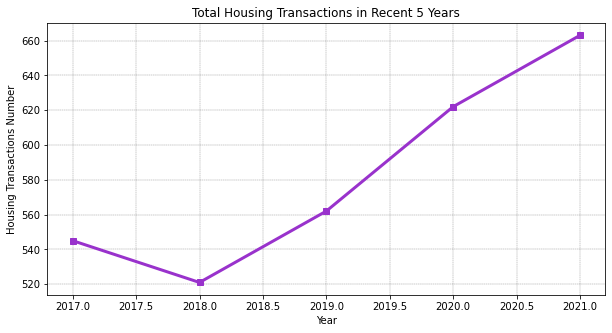

In [25]:
# which year is the hottest in the housing market? 
# Which year is the most deserted?

Y2017 = redfin[redfin['SOLD DATE'].str.contains("2017", regex=False)]
print("2017 " + str(len(Y2017.index)))

Y2018 = redfin[redfin['SOLD DATE'].str.contains("2018", regex=False)]
print("2018 " + str(len(Y2018.index)))

Y2019 = redfin[redfin['SOLD DATE'].str.contains("2019", regex=False)]
print("2019 " + str(len(Y2019.index)))

Y2020 = redfin[redfin['SOLD DATE'].str.contains("2020", regex=False)]
print("2020 " + str(len(Y2020.index)))

Y2021 = redfin[redfin['SOLD DATE'].str.contains("2021", regex=False)]
print("2021 " + str(len(Y2021.index)))


plt.figure(figsize=(10,5))
plt.grid(color='k', ls = '-.', lw = 0.2)
plt.title('Total Housing Transactions in Recent 5 Years')

x = np.array([2017,2018,2019,2020,2021])
y = np.array([545,521,562,622,663])

plt.plot(x,y,'ys-',linewidth=3, color = 'darkorchid')
plt.ylabel('Housing Transactions Number')
plt.xlabel('Year')
plt.grid(True)

#### According to the above chart, we can see:
#### 2018， the trade war between China and American
#### 2020， the Pandemic

#### Using the data from the same month of different years. I choose April and October (Reason has been told previously.)  to calculate the growth rate of each year. 


In [26]:
# April 

# 2017 compares 2018
Y2017A = redfin[redfin['SOLD DATE'].str.contains("2017", regex=False) & redfin['SOLD DATE'].str.contains("April", regex=False)]
Y2018A = redfin[redfin['SOLD DATE'].str.contains("2018", regex=False) & redfin['SOLD DATE'].str.contains("April", regex=False)]

# 2018 compares 2019
Y2019A = redfin[redfin['SOLD DATE'].str.contains("2019", regex=False) & redfin['SOLD DATE'].str.contains("April", regex=False)]

# 2019 compares 2020
Y2020A = redfin[redfin['SOLD DATE'].str.contains("2020", regex=False) & redfin['SOLD DATE'].str.contains("April", regex=False)]

# 2020 compares 2021
Y2021A = redfin[redfin['SOLD DATE'].str.contains("2021", regex=False) & redfin['SOLD DATE'].str.contains("April", regex=False)]

print("2017 April  " + str(len(Y2017A.index)))
print("2018 April  " + str(len(Y2018A.index)))
print("2019 April  " + str(len(Y2019A.index)))
print("2020 April  " + str(len(Y2020A.index))) # April is the beginning of pendanmic in the USA
print("2021 April  " + str(len(Y2021A.index)))


2017 April  58
2018 April  49
2019 April  54
2020 April  46
2021 April  80


In [27]:
# calculate the the Growth Rate of Aprils
# growth rate : (Y2021 - Y2020) / Y2020 * 100 = %

list_april = [len(Y2017A.index), len(Y2018A.index), len(Y2019A.index), len(Y2020A.index), len(Y2021A.index)]

growth_rate = np.exp(np.diff(np.log(list_april))) - 1
growth_rate


array([-0.15517241,  0.10204082, -0.14814815,  0.73913043])

In [28]:
# October 

# 2017 compares 2018
Y2017Oct = redfin[redfin['SOLD DATE'].str.contains("2017", regex=False) & redfin['SOLD DATE'].str.contains("October", regex=False)]
Y2018Oct = redfin[redfin['SOLD DATE'].str.contains("2018", regex=False) & redfin['SOLD DATE'].str.contains("October", regex=False)]

# 2018 compares 2019
Y2019Oct = redfin[redfin['SOLD DATE'].str.contains("2019", regex=False) & redfin['SOLD DATE'].str.contains("October", regex=False)]

# 2019 compares 2020
Y2020Oct = redfin[redfin['SOLD DATE'].str.contains("2020", regex=False) & redfin['SOLD DATE'].str.contains("October", regex=False)]

# 2020 compares 2021
Y2021Oct = redfin[redfin['SOLD DATE'].str.contains("2021", regex=False) & redfin['SOLD DATE'].str.contains("October", regex=False)]

print("2017 October  " + str(len(Y2017Oct.index)))
print("2018 October  " + str(len(Y2018Oct.index)))
print("2019 October  " + str(len(Y2019Oct.index)))
print("2020 October  " + str(len(Y2020Oct.index))) 
print("2021 October  " + str(len(Y2021Oct.index)))



2017 October  50
2018 October  46
2019 October  48
2020 October  73
2021 October  76


In [29]:
# calculate the the Growth Rate of October
# growth rate : (Y2021 - Y2020) / Y2020 * 100 = %

list_Oct = [len(Y2017Oct.index), len(Y2018Oct.index), len(Y2019Oct.index), len(Y2020Oct.index), len(Y2021Oct.index)]

growth_rate = np.exp(np.diff(np.log(list_Oct))) - 1
growth_rate

array([-0.08      ,  0.04347826,  0.52083333,  0.04109589])

Text(0.5, 0, 'Years')

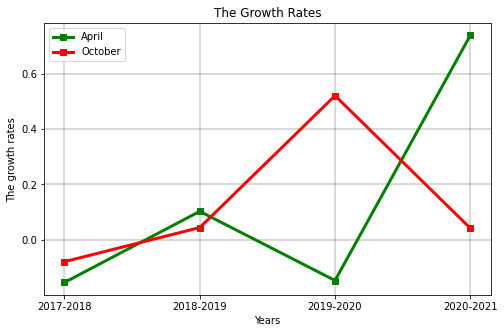

In [30]:
x1 = np.array(["2017-2018","2018-2019","2019-2020","2020-2021"])
y1 = np.array([-0.15517241, 0.10204082, -0.14814815, 0.73913043])



x2 = np.array(["2017-2018","2018-2019","2019-2020","2020-2021"])
y2 = np.array([-0.08 , 0.04347826, 0.52083333, 0.04109589])



plt.figure(figsize=(8,5))
plt.plot(x1,y1,'ys-',linewidth=3, color = 'g', label='April')
plt.plot(x2,y2,'ys-',linewidth=3, color = 'r', label='October')
plt.legend()
plt.grid(color='k', lw = 0.3)
plt.title('The Growth Rates')
plt.ylabel('The growth rates')
plt.xlabel('Years')

#plt.scatter(x1, y1)
#plt.scatter(x2, y2)

#### explanation of above chart:

Which month should I choose?
I avoid months like January or August. Well, actually are December and July. 
Give an extreme example, in December, no one wants to work, thus the transaction number of  houses might close to zero, no matter the year.
So I choose April and October, which are in the middle of January and August.

two interesting things:

#### The April of 2020, goes down, because of the pandemic was just happened in the USA.

#### The April 2021, the news about morgage rate decreasing broadcasted. 

April of 2021, mortgage rate decreasing news (The means used by the government to stimulate the economy) flew everywhere during the pandemic.

（When the interest rate on deposits goes low, and the interest rate on loans goes low, everyone tends to let the money flow.）


I extract the volume of housing transactions in April/October each year
calculate their growth rate


The price rises in most years. I have to make sure, the rise of 2020 and 2021 are not because of the time flies, but because of the decreasing mortgage rate news.


#### explanation of above chart:

Which month should I choose?
I avoid months like January or August. Well, actually are December and July. 
Give an extreme example, in December, no one wants to work, thus the transaction number of  houses might close to zero, no matter the year.
So I choose April and October, which are in the middle of January and August.

two interesting things:

#### The April of 2020, goes down, because of the pandemic was just happened in the USA.

#### The April 2021, the news about morgage rate decreasing broadcasted. 

April of 2021, mortgage rate decreasing news (The means used by the government to stimulate the economy) flew everywhere during the pandemic.

（When the interest rate on deposits goes low, and the interest rate on loans goes low, everyone tends to let the money flow.）


I extract the volume of housing transactions in April/October each year
calculate their growth rate


The price rises in most years. I have to make sure, the rise of 2020 and 2021 are not because of the time flies, but because of the decreasing mortgage rate news.


In [32]:
redfin

,SOLD DATE,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,STATUS
0,November-29-2021,Townhouse,Sunnyvale,94086,1230000,2.0,2.5,1553.0,1.0,1991.0,792.0,505.0,Sold
1,September-8-2021,Single Family Residential,Sunnyvale,94086,2500000,3.0,2.5,1688.0,4964.0,2000.0,1481.0,NaN,Sold
2,February-17-2017,Townhouse,Sunnyvale,94085,849000,2.0,2.5,1277.0,867.0,2006.0,665.0,235.0,Sold
3,May-14-2018,Single Family Residential,Sunnyvale,94086,1700000,3.0,2.0,1200.0,5187.0,1944.0,1417.0,NaN,Sold
4,October-15-2020,Single Family Residential,Sunnyvale,94089,1300000,3.0,2.0,1108.0,6300.0,1958.0,1173.0,NaN,Sold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,September-30-2020,Single Family Residential,San Jose,95129,2510000,5.0,3.0,2431.0,6000.0,1960.0,1032.0,NaN,Sold
3252,July-6-2018,Single Family Residential,San Jose,95129,2262888,4.0,2.0,1246.0,7924.0,1956.0,1816.0,NaN,Sold
3253,July-17-2017,Single Family Residential,San Jose,95129,1681320,4.0,2.0,1318.0,7434.0,1956.0,1276.0,NaN,Sold
3254,July-17-2017,Single Family Residential,San Jose,95129,1830000,4.0,3.5,2571.0,8071.0,2011.0,712.0,NaN,Sold


### Did houses with larger yards sell for higher prices during the epidemic? (January 1, 2020 is the limit)

1. Since the most common room type is 3b2b, and the most common indoor area is 1200-1800, I selected the houses that meet the above conditions in order to control the variables. The only variable is the size of the yard.

2. Yard area = lot size-indoor area.

3. In order to exclude the situation that the house will grow with the year, I calculated the annual growth rate for the five years from 2017 to 2021. (2017-2018 groth rate, 2018-2019, 2019-2020 ||||| 2020-2021 2021-2022)

4. Divide the area of the backyard into "<5500", "5500-8500", ">8500" to consider

2534.0
12078.0
[ 0.15068284 -0.07598446  0.07125505  0.13505925]
[ 0.02087063  0.02121601 -0.04319035  0.32134218]
[-0.1833286  -0.04016693  0.24658514  0.11068644]


Text(0.5, 0, 'years')

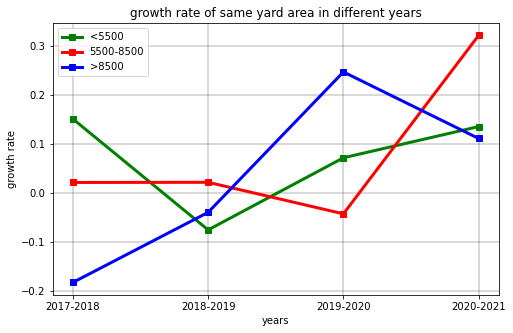

In [33]:
redfinsfh = redfin[redfin['PROPERTY TYPE'] == "Single Family Residential"]
Bed3 = redfinsfh[redfinsfh['BEDS'] == 3]
Bath2 = Bed3[Bed3['BATHS'] == 2]

range1200_1800 = Bath2[(Bath2['SQUARE FEET'] >= 1200) & (Bath2['SQUARE FEET'] < 1800)]

yard = range1200_1800['LOT SIZE'] - range1200_1800['SQUARE FEET']

print(yard.min())
print(yard.max())

range1200_1800.insert(loc=0, column='yard',value=yard)

r2017 = range1200_1800[range1200_1800['SOLD DATE'].str.contains("2017", regex=False)]
r2018 = range1200_1800[range1200_1800['SOLD DATE'].str.contains("2018", regex=False)]
r2019 = range1200_1800[range1200_1800['SOLD DATE'].str.contains("2019", regex=False)]
r2020 = range1200_1800[range1200_1800['SOLD DATE'].str.contains("2020", regex=False)]
r2021 = range1200_1800[range1200_1800['SOLD DATE'].str.contains("2021", regex=False)]

#2017
yard_size=["<5500", '5500-8500', '>8500']
yard1=r2017[(r2017['yard'] < 5500)]['PRICE'].mean()
yard2=r2017[(r2017['yard'] >= 5500) & (r2017['SQUARE FEET'] < 8500)]['PRICE'].mean()
yard3=r2017[(r2017['yard'] >= 8500)]['PRICE'].mean()


#2018
yard_size=["<5500", '5500-8500', '>8500']
yard4=r2018[(r2018['yard'] < 5500)]['PRICE'].mean()
yard5=r2018[(r2018['yard'] >= 5500) & (r2018['SQUARE FEET'] < 8500)]['PRICE'].mean()
yard6=r2018[(r2018['yard'] >= 8500)]['PRICE'].mean()


#2019
yard_size=["<5500", '5500-8500', '>8500']
yard7=r2019[(r2019['yard'] < 5500)]['PRICE'].mean()
yard8=r2019[(r2019['yard'] >= 5500) & (r2019['SQUARE FEET'] < 8500)]['PRICE'].mean()
yard9=r2019[(r2019['yard'] >= 8500)]['PRICE'].mean()


#2020
yard_size=["<5500", '5500-8500', '>8500']
yard10=r2020[(r2020['yard'] < 5500)]['PRICE'].mean()
yard11=r2020[(r2020['yard'] >= 5500) & (r2020['SQUARE FEET'] < 8500)]['PRICE'].mean()
yard12=r2020[(r2020['yard'] >= 8500)]['PRICE'].mean()


#2021

yard_size=["<5500", '5500-8500', '>8500']
yard13=r2021[(r2021['yard'] < 5500)]['PRICE'].mean()
yard14=r2021[(r2021['yard'] >= 5500) & (r2021['SQUARE FEET'] < 8500)]['PRICE'].mean()
yard15=r2021[(r2021['yard'] >= 8500)]['PRICE'].mean()

# growth rate of same yard area in different years

r5500 = [yard1, yard4,yard7,yard10,yard13]
growth_rate1 = np.exp(np.diff(np.log(r5500))) - 1
print(growth_rate1)

r5500_8500 = [yard2, yard5,yard8,yard11,yard14]
growth_rate2 = np.exp(np.diff(np.log(r5500_8500))) - 1
print(growth_rate2)

r8500 = [yard3, yard6,yard9,yard12,yard15]
growth_rate3 = np.exp(np.diff(np.log(r8500))) - 1
print(growth_rate3)

#<5500
x1 = np.array(["2017-2018","2018-2019","2019-2020","2020-2021"])
y1 = np.array([0.15068284,-0.07598446,0.07125505,0.13505925])
#5500-8500
x2 = np.array(["2017-2018","2018-2019","2019-2020","2020-2021"])
y2 = np.array([0.02087063,0.02121601,-0.04319035,0.32134218])
#>8500
x3 = np.array(["2017-2018","2018-2019","2019-2020","2020-2021"])
y3 = np.array([-0.1833286,-0.04016693,0.24658514,0.11068644])

plt.figure(figsize=(8,5))

plt.plot(x1,y1,'ys-',linewidth=3, color = 'g', label='<5500')
plt.plot(x2,y2,'ys-',linewidth=3, color = 'r', label='5500-8500')
plt.plot(x3,y3,'ys-',linewidth=3, color = 'b', label='>8500')

plt.legend()
plt.grid(color='k', lw = 0.3)
plt.title('growth rate of same yard area in different years')
plt.ylabel('growth rate')
plt.xlabel('years')

A little completed chart,
the interesting points I found are,

the blue line goes up quickly, does that mean people love big yards during the pandemic?

and the red line, it really does fast in 2021, does that mean people decide to spend money on larger yards instead of beds, baths or other things?

But in general, the trend is not clear enough for me to give a firm result. So maybe I could. Maybe I will dig it up in the future.

#### During the epidemic, the price of houses with convenient transportation has not risen as fast as other places?
#### Sunnyvale the center of Silicon Valley nearby 101 highway (San Francisco to LA)
#### 95118 the furthest place away from sunnyvale in this research


In [34]:
after_covid = redfin[redfin['SOLD DATE'].str.contains("2020", regex=False) | redfin['SOLD DATE'].str.contains("2021", regex=False)]
before_covid = redfin[redfin['SOLD DATE'].str.contains("2017", regex=False) | redfin['SOLD DATE'].str.contains("2018", regex=False) | redfin['SOLD DATE'].str.contains("2019", regex=False) | redfin['SOLD DATE'].str.contains("2020", regex=False)]

In [35]:
#fetch sunnyvale
Asunnyvale = after_covid[after_covid['CITY'] == "Sunnyvale"]
Bsunnyvale = before_covid[before_covid['CITY'] == "Sunnyvale"]

meanSunnyvale17 = Bsunnyvale[Bsunnyvale['SOLD DATE'].str.contains("2017", regex=False)]['PRICE'].mean()
meanSunnyvale18 = Bsunnyvale[Bsunnyvale['SOLD DATE'].str.contains("2018", regex=False)]['PRICE'].mean() 
meanSunnyvale19 = Bsunnyvale[Bsunnyvale['SOLD DATE'].str.contains("2019", regex=False)]['PRICE'].mean()
meanSunnyvale20 = Asunnyvale[Asunnyvale['SOLD DATE'].str.contains("2020", regex=False)]['PRICE'].mean()
meanSunnyvale21 = Asunnyvale[Asunnyvale['SOLD DATE'].str.contains("2021", regex=False)]['PRICE'].mean()


list_sunnyvale = [meanSunnyvale17, meanSunnyvale18, meanSunnyvale19, meanSunnyvale20,meanSunnyvale21]
growth_rate1 = np.exp(np.diff(np.log(list_sunnyvale))) - 1
print(growth_rate1)


[ 0.09268764 -0.09060881  0.1208563   0.06360637]


In [36]:
# fetch 95118 from these two new dataframes
A95118 = after_covid[after_covid['ZIP OR POSTAL CODE'] == 95118]
B95118 = before_covid[before_covid['ZIP OR POSTAL CODE'] == 95118]

'''
# fetch 95124 from these two new dataframes
A95124 = after_covid[after_covid['ZIP OR POSTAL CODE'] == 95124]
B95124 = before_covid[before_covid['ZIP OR POSTAL CODE'] == 95124]
'''

"\n# fetch 95124 from these two new dataframes\nA95124 = after_covid[after_covid['ZIP OR POSTAL CODE'] == 95124]\nB95124 = before_covid[before_covid['ZIP OR POSTAL CODE'] == 95124]\n"

In [37]:
# Mean of evey year in 94085, 94086, 94089

#95118
mean201718 = B95118[B95118['SOLD DATE'].str.contains("2017", regex=False)]['PRICE'].mean()
mean201818 = B95118[B95118['SOLD DATE'].str.contains("2018", regex=False)]['PRICE'].mean()
mean201918 = B95118[B95118['SOLD DATE'].str.contains("2019", regex=False)]['PRICE'].mean()
mean202018 = A95118[A95118['SOLD DATE'].str.contains("2020", regex=False)]['PRICE'].mean()
mean202118 = A95118[A95118['SOLD DATE'].str.contains("2021", regex=False)]['PRICE'].mean()

'''
#95124
mean201724 = B95124[B95124['SOLD DATE'].str.contains("2017", regex=False)]['PRICE'].mean()
mean201824 = B95124[B95124['SOLD DATE'].str.contains("2018", regex=False)]['PRICE'].mean()
mean201924 = B95124[B95124['SOLD DATE'].str.contains("2019", regex=False)]['PRICE'].mean()
mean202024 = A95124[A95124['SOLD DATE'].str.contains("2020", regex=False)]['PRICE'].mean()
mean202124 = A95124[A95124['SOLD DATE'].str.contains("2021", regex=False)]['PRICE'].mean()
'''

'\n#95124\nmean201724 = B95124[B95124[\'SOLD DATE\'].str.contains("2017", regex=False)][\'PRICE\'].mean()\nmean201824 = B95124[B95124[\'SOLD DATE\'].str.contains("2018", regex=False)][\'PRICE\'].mean()\nmean201924 = B95124[B95124[\'SOLD DATE\'].str.contains("2019", regex=False)][\'PRICE\'].mean()\nmean202024 = A95124[A95124[\'SOLD DATE\'].str.contains("2020", regex=False)][\'PRICE\'].mean()\nmean202124 = A95124[A95124[\'SOLD DATE\'].str.contains("2021", regex=False)][\'PRICE\'].mean()\n'

In [38]:
list_18 = [mean201718, mean201818, mean201918, mean202018, mean202118]
growth_rate1 = np.exp(np.diff(np.log(list_18))) - 1
print(growth_rate1)
'''
list_24 = [mean201724, mean201824, mean201924, mean202024, mean202124]
growth_rate2 = np.exp(np.diff(np.log(list_24))) - 1
print(growth_rate2)
'''

[ 0.10072284 -0.10529342  0.15633379  0.18976017]


'\nlist_24 = [mean201724, mean201824, mean201924, mean202024, mean202124]\ngrowth_rate2 = np.exp(np.diff(np.log(list_24))) - 1\nprint(growth_rate2)\n'

Text(0.5, 0, 'Years')

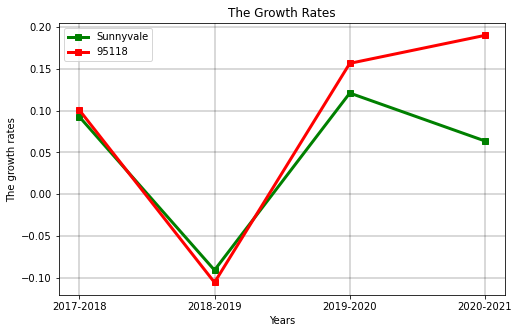

In [39]:
x1 = np.array(["2017-2018","2018-2019","2019-2020","2020-2021"])
y1 = np.array([0.09268764, -0.09060881, 0.1208563, 0.06360637])



x2 = np.array(["2017-2018","2018-2019","2019-2020","2020-2021"])
y2 = np.array([0.10072284, -0.10529342, 0.15633379, 0.18976017])

'''
x3 = np.array(["2017-2018","2018-2019","2019-2020","2020-2021"])
y3 = np.array([0.19433182, -0.06803019, 0.03521968, 0.22091172])
'''

plt.figure(figsize=(8,5))
plt.plot(x1,y1,'ys-',linewidth=3, color = 'g', label='Sunnyvale')
plt.plot(x2,y2,'ys-',linewidth=3, color = 'r', label='95118')
'''
plt.plot(x3,y3,'ys-',linewidth=3, color = 'k', label='95124')
'''
plt.legend()
plt.grid(color='k', lw = 0.3)
plt.title('The Growth Rates')
plt.ylabel('The growth rates')
plt.xlabel('Years')

#plt.scatter(x1, y1)
#plt.scatter(x2, y2)

In [ ]:
#######################LingLi Code#######################

Besides external causes, there are properties of a house itself that affects housing price. 
We analyze the relationship of a townhouse or single family residential with different bedrooms, bathroom, postcode, city, year-built, lot size, square feet, and HOA fee.


In [52]:
# replace space with underline in columns names
# redfin_new.columns = [c.replace(' ', '_') for c in redfin_new.columns]
# redfin_new.columns1
redfin_new.columns = redfin_new.columns.str.replace(' ', '_')
redfin_new.columns

Index(['SOLD_DATE', 'PROPERTY_TYPE', 'CITY', 'ZIP_OR_POSTAL_CODE', 'PRICE',
       'BEDS', 'BATHS', 'SQUARE_FEET', 'LOT_SIZE', 'YEAR_BUILT',
       '$/SQUARE_FEET', 'HOA/MONTH', 'STATUS'],
      dtype='object')

In [53]:
sj_th = redfin_new[redfin_new["PROPERTY_TYPE"] == "Townhouse"]
sj_sfh = redfin_new[redfin_new["PROPERTY_TYPE"] == "Single Family Residential"]

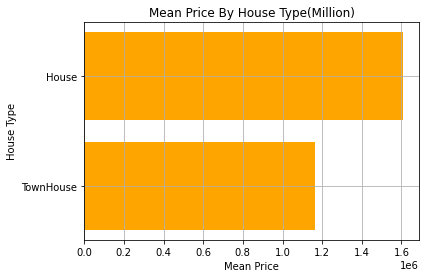

In [100]:
#Compare Median of Townhouse and Single Family Residential /sfh 和th 价格中位数对比
th_m=sj_th.loc[:,'PRICE'].mean()
sfh_m=sj_sfh.loc[:,'PRICE'].mean()
house_type = ['TownHouse', 'House']
price = [th_m,sfh_m]
plt.barh(house_type,price, color = 'orange')
plt.title('Mean Price By House Type(Million)')
plt.xlabel('Mean Price')
plt.ylabel('House Type')
plt.grid()

Townhouse and single family residential are two types of properties. There are 554 townhouses and 2703 single family residences in our data. From our code, we see that the average price for a townhouse is a little 1.6 million while it is a little less than 1.2 million dollars. 

When it comes to buying a house, one of the questions we would ask is how many rooms do we want? Three bedrooms with two bathrooms or two bedrooms with two bathrooms? It varies from person to person. We want to know what the most popular bedroom type and bathroom type is that people would like to choose for townhouse and single family house. 


In [55]:
# The relationship of Bedrooms and Housing Price 房子价格和房间的关系

In [56]:
# total bedrooms count
redfin_new['BEDS'].value_counts()

3.0    1682
4.0    1043
2.0     334
5.0     183
6.0       8
1.0       7
Name: BEDS, dtype: int64

There are 554 Townhouses in this data.


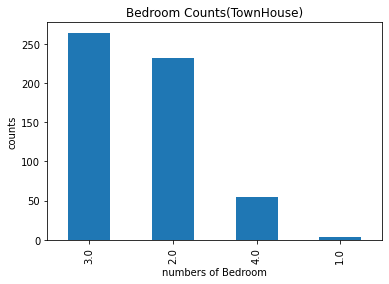

There are 2703 Single Family Residential in this data.


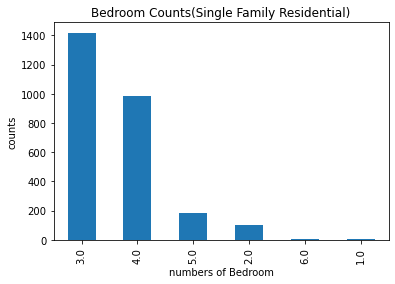

In [57]:
# Different bedroom type counts among townhouse 卧室数量排名th
th_total = len(sj_th)
print("There are "+ str(th_total) + " Townhouses in this data.")
beds_count_th=sj_th['BEDS'].value_counts()
beds_count_th.plot(kind = 'bar')
plt.title('Bedroom Counts(TownHouse)')
plt.ylabel('counts')
plt.xlabel('numbers of Bedroom')
plt.show()

# Different bedroom type counts among single family residential 卧室数量排名sfh
sfh_total = len(sj_sfh)
print("There are "+ str(sfh_total) + " Single Family Residential in this data.")
beds_count_sfh=sj_sfh['BEDS'].value_counts()
beds_count_sfh.plot(kind = 'bar')
plt.title('Bedroom Counts(Single Family Residential)')
plt.ylabel('counts')
plt.xlabel('numbers of Bedroom')
plt.show()

As for bedroom type, the first bar chart illustrates over 250 townhouses have three bedrooms,  about 230 townhouses have two bedrooms, and one bedroom type is the least common. The second chart shows around 1400 houses have three bedrooms, and 1000 houses have four bedrooms. The number of houses with five bedrooms is way less than the four bedroom type. What surprised me was that the two bedroom type is not even on the top three most common room types. 

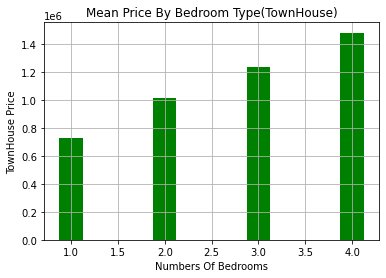

In [58]:
# median price of different bedroom type in TownHouse
# Bar Graph for Median Price By Bedroom Type(TownHouse)
rooms_th=[]
price_th=[]
for i in sj_th.BEDS.unique():
    rooms_th.append(i)
    price_th.append(sj_th[sj_th["BEDS"] == i].loc[:,'PRICE'].mean())

plt.bar(rooms_th,price_th, color = 'g', width=0.25)
plt.title('Mean Price By Bedroom Type(TownHouse)')
plt.xlabel('Numbers Of Bedrooms')
plt.ylabel('TownHouse Price')
plt.grid()

[2.0, 4.0, 3.0, 1.0]
[1142284.2549019607, 1754220.2793522268, 1464638.1424541608, 1428000.0]


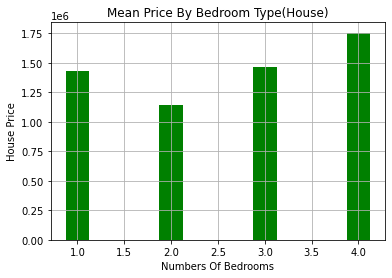

In [59]:
# median price of different bedroom type in Single Family Residential
# Bar Graph for Median Price By Bedroom Type(Single Family Residential)

rooms_sfh=[]
price_sfh=[]
for i in sj_th.BEDS.unique():
    rooms_sfh.append(i)
    price_sfh.append(sj_sfh[sj_sfh["BEDS"] == i].loc[:,'PRICE'].mean())
    
print(rooms_sfh)
print(price_sfh)

plt.bar(rooms_sfh,price_sfh, color = 'g', width=0.25)
plt.title('Mean Price By Bedroom Type(House)')
plt.xlabel('Numbers Of Bedrooms')
plt.ylabel('House Price')
plt.grid()

We guess the more bedrooms in a townhouse or house, the more it costs to buy. But the Mean Price By Bedroom Type bar graph displays a different story. The one bedroom type is more expensive than the two bedroom type. I then checked the data for one bedroom type. There are only four single family houses that only have one bedroom and they are located in rich areas like Sunnyvale and Cupertino. When we have  more data than this, we will have  better data accuracy. 

When choosing among bedroom types, people need to consider:
Do you need an extra room for a home office if you work from home?
How many kids are you going to have?
Can we afford one more room?
Do we need to prepare a guest room? 
Do we need to rent out one room to pay off the mortgage?

In [60]:
sj_sfh[(sj_sfh['BEDS'] == 1)]['CITY']

163     Sunnyvale
225     Sunnyvale
362     Cupertino
2869     San Jose
Name: CITY, dtype: object

In [61]:
# The relationship of Bathrooms and Housing Price 房子价格和厕所的关系

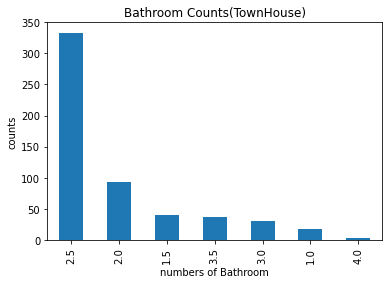

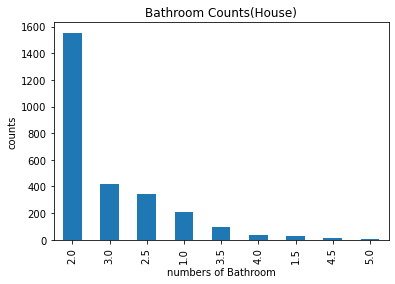

In [62]:
# Different bathroom type counts among townhouse. 厕所数量排名在th
bath_number_th = sj_th['BATHS'].value_counts()
bath_number_sfh = sj_sfh['BATHS'].value_counts()
bath_number_th.plot(kind = 'bar')
plt.title('Bathroom Counts(TownHouse)')
plt.ylabel('counts')
plt.yticks(np.arange(0, 400, 50))
plt.xlabel('numbers of Bathroom')
plt.show()

# Different bathroom type counts among single family residential. 厕所数量排名在sfh
bath_number_sfh.plot(kind = 'bar')
plt.title('Bathroom Counts(House)')
plt.ylabel('counts')
plt.xlabel('numbers of Bathroom')
plt.show()

Similarly, the number of bathrooms plays an important part for future homeowners. It can be seen that 2.5 bathroom types are most common in townhouses and two bathroom types is only one third of the number of two and half bathrooms. Likewise, 2 bathroom types in a single family house is three times more than the one with three bathrooms. According to the charts, people are less likely to choose to buy houses when it only has one bathroom or more than three bathrooms for townhouses and has one and half bathrooms and more than four bathrooms. The suppliers for those types are most likely to be lower. 

[1150000.0, 1488500.0, 1020000.0, 1405000.0, 867500.0, 822500.0, 1350000.0]
[2.5, 3.5, 2.0, 3.0, 1.5, 1.0, 4.0]


Text(0, 0.5, 'TownHouse Price')

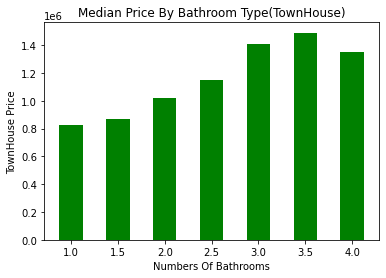

In [63]:
# median price of different bathroom type in TownHouse
# Bar Graph for Median Price By Bathroom Type(TownHouse)

bath_rooms_th=[]
bath_price_th=[]
for i in sj_th.BATHS.unique():
    bath_rooms_th.append(i)
    bath_price_th.append(sj_th[sj_th["BATHS"] == i].loc[:,'PRICE'].median())
    
print(bath_price_th)
print(bath_rooms_th)

plt.bar(bath_rooms_th,bath_price_th, color = 'g', width=0.25)

plt.title('Median Price By Bathroom Type(TownHouse)')
plt.xlabel('Numbers Of Bathrooms')
plt.ylabel('TownHouse Price')

[2.5, 3.5, 2.0, 3.0, 1.5, 1.0, 4.0]
[1640000.0, 2150000.0, 1421000.0, 1720000.0, 1265000.0, 1150000.0, 2000000.0]


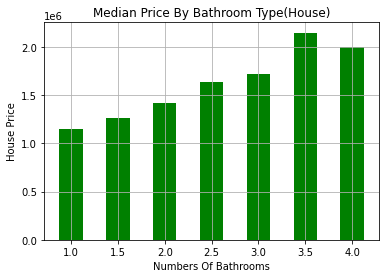

In [64]:
# median price of different bathroom type in single family residential
# Bar Graph for Median Price By Bathroom Type(Single Family Residential)

bath_rooms_sfh=[]
bath_price_sfh=[]
for i in sj_th.BATHS.unique():
    bath_rooms_sfh.append(i)
    bath_price_sfh.append(sj_sfh[sj_sfh["BATHS"] == i].loc[:,'PRICE'].median())
    
print(bath_rooms_sfh)
print(bath_price_sfh)

plt.bar(bath_rooms_sfh,bath_price_sfh, color = 'g', width=0.25)
plt.title('Median Price By Bathroom Type(House)')
plt.xlabel('Numbers Of Bathrooms')
plt.ylabel('House Price')
plt.grid()

The chart gives information about the relation between the number of bathrooms and the housing price. It is not hard to find that the more bathrooms is the better, but that’s until we get to four bathrooms. 

The ratio of bedrooms to bathrooms is an appealing topic. but we also need to take other things into consideration, so we are not discussing that in this part.

Location
The location of a house is most people’s priority. Close to work or school, easy access to freeway or public transportation, proximity to grocery stores or major supermarkets, a quiet neighbourhood and more. 

Due to the limitation of our data, we are mainly exploring the housing price with postcodes and cities.

Text(0, 0.5, 'PRICE')

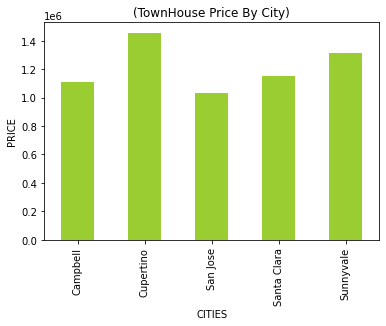

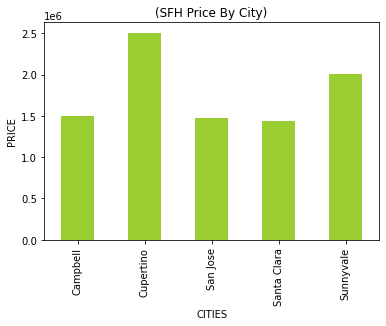

In [65]:
# Different townhouse price by City
sj_th3 = sj_th.groupby('CITY')['PRICE'].mean()
sj_th3
plt.figure(); 
sj_th3.plot.bar(title='(TownHouse Price By City)', color='yellowgreen'); 
plt.xlabel('CITIES'); 
plt.ylabel('PRICE') 

sj_sfh3 = sj_sfh.groupby('CITY')['PRICE'].mean()
sj_sfh3
plt.figure(); 
sj_sfh3.plot.bar(title='(SFH Price By City)', color='yellowgreen'); 
plt.xlabel('CITIES'); 
plt.ylabel('PRICE')  

Cupertino is the most expensive city among listed cities. 
It is known as the home to the big tech company, Apple Inc. It is also where a lot of the biggest technological companies started. Cupertino has less homeless people, the area has less crime rate and is very safe compared to other areas. A lot of families chose to go there because of top-rated schools. 

In [66]:
# There are duplicated postcode, clean the data for both Townhouse and Single Family Residential///////////////
sj_sfh1=sj_sfh.replace('95117',95117)
sj_sfh2=sj_sfh1.replace('95124',95124)
print(len(sj_sfh2.ZIP_OR_POSTAL_CODE.unique()))

sj_th1=sj_th.replace('95117',95117)
sj_th2=sj_th1.replace('95117-2000',95117)
len(sj_th2.ZIP_OR_POSTAL_CODE.unique())

19


16

[94086, 94085, 94089, 94087, 95051, 95014, 95129, '95008']
[1348217.6363636365, 1249812.923076923, 1374800.0, 1242312.5, 1149799.5862068965, 1455986.12345679, 1355234.1875, 1112673.9019607843]


Text(0, 0.5, 'TownHouse Price')

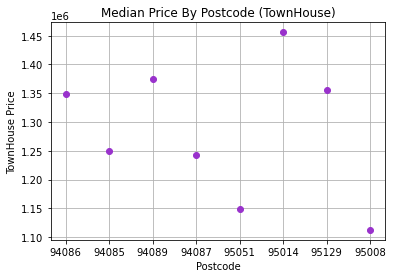

In [67]:
# median price of different postcodes in TownHouse
# Bar Graph for Median Price By Postcodes(TownHouse)
# There are more than 19 postcodes in SFH and 16 in TH. So I seperate them into two Graph

postcode_th=[]
postcode_price_th=[]
for i in sj_th2.ZIP_OR_POSTAL_CODE.unique()[:8]:
    postcode_th.append(i)
    postcode_price_th.append(sj_th2[sj_th2["ZIP_OR_POSTAL_CODE"] == i].loc[:,'PRICE'].mean())
print(postcode_th)
print(postcode_price_th)
# plt.pie(postcode_th,postcode_price_th, color = 'g',)

plt.plot(postcode_th, postcode_price_th, "go", color = "darkorchid")
plt.grid(True)
plt.title('Median Price By Postcode (TownHouse)')
plt.xlabel('Postcode')
plt.ylabel('TownHouse Price')



[95117, 95054, 95050, 95118, 95124, '95130', 95128]
[944515.95, 1210925.8333333333, 1138788.5555555555, 829754.716981132, 1009895.8333333334, 845000.0, 913495.5]


Text(0, 0.5, 'TownHouse Price')

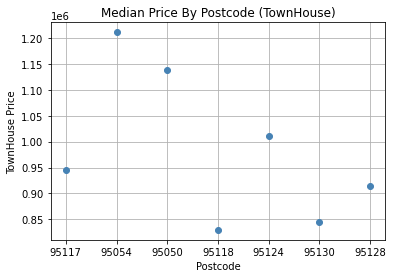

In [68]:
# median price of different postcodes in TownHouse
# Bar Graph for Median Price By Postcodes(TownHouse)

postcode_th2=[]
postcode_price_th2=[]
for j in sj_th2.ZIP_OR_POSTAL_CODE.unique()[9:]:
    postcode_th2.append(j)
    postcode_price_th2.append(sj_th2[sj_th2["ZIP_OR_POSTAL_CODE"] == j].loc[:,'PRICE'].mean())
print(postcode_th2)
print(postcode_price_th2)
# plt.pie(postcode_th2,postcode_price_th2, color = 'g',)

plt.plot(postcode_th2, postcode_price_th2, "go", color = "steelblue")
plt.grid(True)
plt.title('Median Price By Postcode (TownHouse)')
plt.xlabel('Postcode')
plt.ylabel('TownHouse Price')


Postcodes 95014 and 95054 have the most expensive mean of townhouses while 95014 and 95118 are two areas that have the lowest average price of townhouses. 

[94086, 94089, 94087, 95051, 94085, 95014, 95129, '95008', '95128', '95125']
[1734833.5492957747, 1308666.6666666667, 2186687.7636363637, 1471433.1055900622, 1476688.3, 2507047.890410959, 2031243.0694980696, 1499115.7185628742, 1176562.5, 1984000.0]


Text(0, 0.5, 'SFH Price')

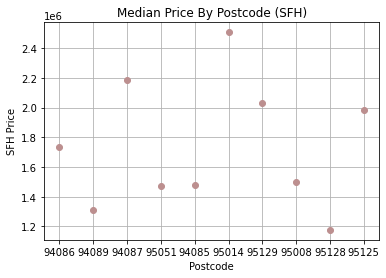

In [69]:
# median price of different postcodes in Single Family Residential
# Bar Graph for Median Price By Postcodes(Single Family Residential)

postcode_sfh=[]
postcode_price_sfh=[]
for i in sj_sfh2.ZIP_OR_POSTAL_CODE.unique()[:10]:
    postcode_sfh.append(i)
    postcode_price_sfh.append(sj_sfh2[sj_sfh1["ZIP_OR_POSTAL_CODE"] == i].loc[:,'PRICE'].mean())
print(postcode_sfh)
print(postcode_price_sfh)
# plt.pie(postcode_th,postcode_price_th, color = 'g',)

plt.plot(postcode_sfh, postcode_price_sfh, "go", color = "rosybrown")
plt.grid(True)
plt.title('Median Price By Postcode (SFH)')
plt.xlabel('Postcode')
plt.ylabel('SFH Price')

['95124', '95130', 95054, 95050, 95117, 95128, 95126, 95118, 95124, 95008]
[nan, 1550850.7441860465, 1264947.9166666667, 1377910.9436619717, 1407188.7032967033, 1235217.9901639344, 1146300.0, 1260584.2294520547, 1455502.7387096775, 1373027.0]


Text(0, 0.5, 'SFH Price')

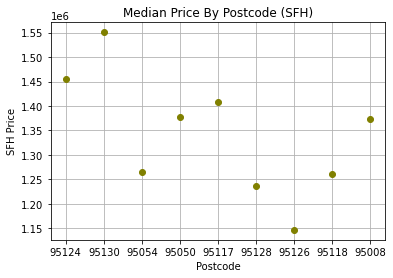

In [70]:
# median price of different postcodes in Single Family Residential
# Bar Graph for Median Price By Postcodes(Single Family Residential)
postcode_sfh1=[]
postcode_price_sfh1=[]
for i in sj_sfh1.ZIP_OR_POSTAL_CODE.unique()[10:]:
    postcode_sfh1.append(i)
    postcode_price_sfh1.append(sj_sfh2[sj_sfh2["ZIP_OR_POSTAL_CODE"] == i].loc[:,'PRICE'].mean())
print(postcode_sfh1)
print(postcode_price_sfh1)
# plt.pie(postcode_th,postcode_price_th, color = 'rosybrown',)

plt.plot(postcode_sfh1, postcode_price_sfh1, "go", color = "olive")
plt.grid(True)
plt.title('Median Price By Postcode (SFH)')
plt.xlabel('Postcode')
plt.ylabel('SFH Price')

Postcodes 95014 and 95054 have the most expensive mean of townhouses while 95014 and 95126 are two areas that have the lowest average price of townhouses. 

Text(0, 0.5, 'PRICE')

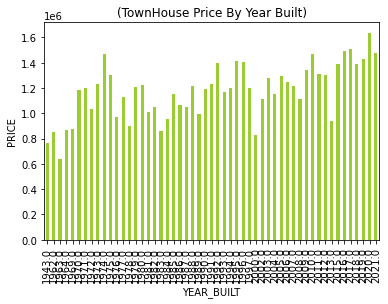

In [71]:
# median price of differnt year buit in TownHouse
# Bar Graph for Median Price By Year Buit(TownHouse)

sj_th3 = sj_th.groupby('YEAR_BUILT')['PRICE'].mean()
sj_th3
plt.figure(); 
sj_th3.plot.bar(title='(TownHouse Price By Year Built)', color='yellowgreen'); 
plt.xlabel('YEAR_BUILT'); 
plt.ylabel('PRICE')  

Text(0, 0.5, 'PRICE')

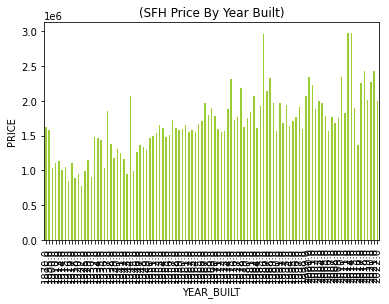

In [72]:
# median price of differnt year buit in TownHouse
# Bar Graph for Median Price By Year Buit(TownHouse)

sj_sfh3 = sj_sfh.groupby('YEAR_BUILT')['PRICE'].mean()
sj_sfh3
plt.figure(); 
sj_sfh3.plot.bar(title='(SFH Price By Year Built)', color='yellowgreen'); 
plt.xlabel('YEAR_BUILT'); 
plt.ylabel('PRICE')  

From the data we have, townhouses are built from the year 1943 to 2021 while single family houses are built from 1870 to 2021. There were less townhouses built before 2020. Although we can still see a price increase over years. but there are other factors like the condition of the house, location of the house or renovations can make a difference in the price. 


Text(0, 0.5, 'Townhouse Price')

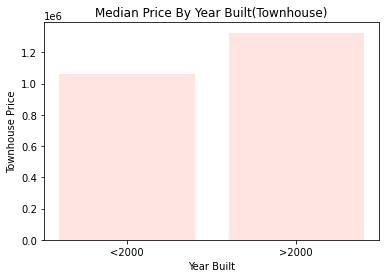

In [73]:
# We divided year-built to 4 periods. 
# The relationship between year built and housing price

year_built=['<2000', '>2000']
period1=sj_th[(sj_th['YEAR_BUILT'] < 2000)]['PRICE'].median()
period2=sj_th[(sj_th['YEAR_BUILT'] >= 2000)]['PRICE'].median()
year_price=[period1, period2]
plt.bar(year_built,year_price, color = 'mistyrose', align="center")
plt.title('Median Price By Year Built(Townhouse)')
plt.xlabel('Year Built')
plt.ylabel('Townhouse Price')



When calculating the value of one’s home, the overall condition of the home is crucial. What you see might not be what you buy. Therefore, buyers normally would hire experts to do the home inspection for the house to make sure the house doesn’t have safety issues. If a house built in 1960 maintains well, it can have the same price as the house built in 2000. 


In [74]:
# The relationship of Lot Size and Housing Price 房子价格和lot size的关系

Text(0, 0.5, 'SFH Price')

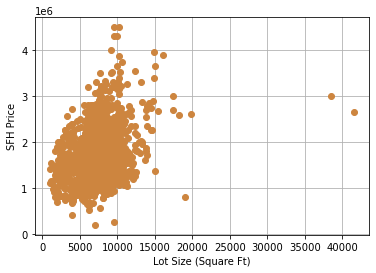

In [75]:
sj_sfh[['LOT_SIZE','PRICE']]
plt.plot(sj_sfh[('LOT_SIZE')],sj_sfh['PRICE'], 'go', color = 'peru')
plt.grid()
plt.xlabel('Lot Size (Square Ft)')
plt.ylabel('SFH Price')

The size of usable space in your house is called square footage. The lot size is the total land space including front and back yards. 

Townhouse’s lot size data includes other public lands, so we don’t have analysis for that.
For the majority of single houses, lot sizes are between 5000-10000 square feet. There are relatively less houses below 5000 square feet. We found out that for all the houses that have 15000 square feet, their price varies from 1.4 million to 4 million. 


1000.0 41569.0


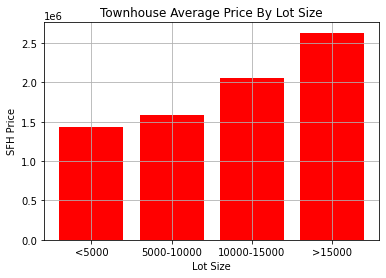

In [76]:
#For townhouse, the lot size also included other land and it varies, so we don't include the data for townhouse. 
# median price of differnt lot size in SFH
# Bar Graph for Average Price By Year Buit(SFH)

lot_min=sj_sfh[(sj_sfh['LOT_SIZE'] >= 0)]['LOT_SIZE'].min()
lot_max=sj_sfh[(sj_sfh['LOT_SIZE'] >= 0)]['LOT_SIZE'].max()
print(lot_min, lot_max)

lot_size=["<5000", '5000-10000', '10000-15000', '>15000']
lot1=sj_sfh[(sj_sfh['LOT_SIZE'] < 5000)]['PRICE'].mean()
lot2=sj_sfh[(sj_sfh['LOT_SIZE'] >= 5000) & (sj_sfh['LOT_SIZE'] < 10000)]['PRICE'].mean()
lot3=sj_sfh[(sj_sfh['LOT_SIZE'] >= 10000) & (sj_sfh['LOT_SIZE'] < 15000)]['PRICE'].mean()
lot4=sj_sfh[(sj_sfh['LOT_SIZE'] >= 15000)]['PRICE'].mean()

lot_price=[lot1, lot2, lot3,lot4 ]
plt.bar(lot_size,lot_price, color = 'red')
plt.title('Townhouse Average Price By Lot Size')
plt.xlabel('Lot Size')
plt.ylabel('SFH Price')
plt.grid()

People tend to pay more for a house with a larger lot size if two houses are under similar condition. Some people think having a bigger lot size can double the  value of the house. It depends on many aspects. If it takes homeowners a lot each month to maintain, fix or improve the situation of the outdoor area. What’s more, if  the added space is not usable because of other issues, the lot is not going to hold much value.  


Text(0, 0.5, 'TH Price')

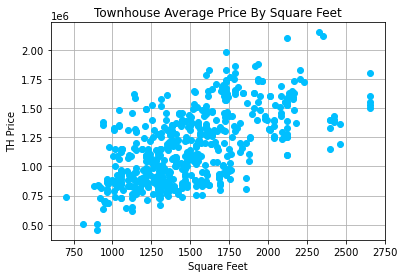

In [77]:
# The relationship of square feet and Housing Price 房子价格和面积的关系
sj_th[['SQUARE_FEET','PRICE']]
plt.plot(sj_th['SQUARE_FEET'],sj_th['PRICE'], 'go', color = 'deepskyblue')
plt.grid()
plt.title('Townhouse Average Price By Square Feet')
plt.xlabel('Square Feet')
plt.ylabel('TH Price')

Text(0, 0.5, 'SFH Price')

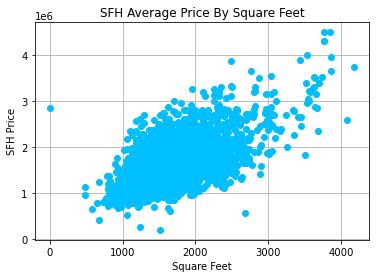

In [78]:
# The relationship of square feet and Housing Price 房子价格和面积的关系
sj_sfh[['SQUARE_FEET','PRICE']]
plt.plot(sj_sfh['SQUARE_FEET'],sj_sfh['PRICE'], 'go', color = 'deepskyblue')
plt.grid()
plt.title('SFH Average Price By Square Feet')
plt.xlabel('Square Feet')
plt.ylabel('SFH Price')

These two simple scatter plots display the connection of area and house price. When we narrow down to a specific area, the relationship will become stronger. 


700.0 2656.0


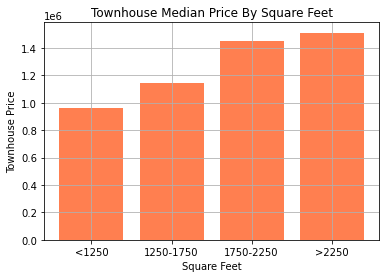

In [79]:
square_min=sj_th[(sj_th['SQUARE_FEET'] >= 0)]['SQUARE_FEET'].min()
square_max=sj_th[(sj_th['SQUARE_FEET'] >= 0)]['SQUARE_FEET'].max()
print(square_min, square_max)

square_size=["<1250", '1250-1750', '1750-2250', '>2250']
square1=sj_th[(sj_th['SQUARE_FEET'] < 1250)]['PRICE'].mean()
square2=sj_th[(sj_th['SQUARE_FEET'] >= 1250) & (sj_th['SQUARE_FEET'] < 1750)]['PRICE'].mean()
square3=sj_th[(sj_th['SQUARE_FEET'] >= 1750) & (sj_th['SQUARE_FEET'] < 2250)]['PRICE'].mean()
square4=sj_th[(sj_th['SQUARE_FEET'] >= 2250)]['PRICE'].mean()

square_price=[square1, square2, square3,square4 ]
plt.bar(square_size,square_price, color = 'coral')
plt.title('Townhouse Median Price By Square Feet')
plt.xlabel('Square Feet')
plt.ylabel('Townhouse Price')
plt.grid()

There is no doubt that the size of a house is a metric to value the price. However this data itself is inconclusive and should not be the only determining element. 

1.0 4178.0


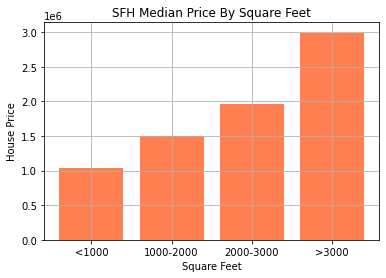

In [80]:
square_min=sj_sfh[(sj_sfh['SQUARE_FEET'] >= 0)]['SQUARE_FEET'].min()
square_max=sj_sfh[(sj_sfh['SQUARE_FEET'] >= 0)]['SQUARE_FEET'].max()
print(square_min, square_max)

square_size=["<1000", '1000-2000', '2000-3000', '>3000']
square1=sj_sfh[(sj_sfh['SQUARE_FEET'] < 1000)]['PRICE'].mean()
square2=sj_sfh[(sj_sfh['SQUARE_FEET'] >= 1000) & (sj_sfh['SQUARE_FEET'] < 2000)]['PRICE'].mean()
square3=sj_sfh[(sj_sfh['SQUARE_FEET'] >= 2000) & (sj_sfh['SQUARE_FEET'] < 3000)]['PRICE'].mean()
square4=sj_sfh[(sj_sfh['SQUARE_FEET'] >= 3000)]['PRICE'].mean()

square_price=[square1, square2, square3,square4 ]
plt.bar(square_size,square_price, color = 'coral')
plt.title('SFH Median Price By Square Feet')
plt.xlabel('Square Feet')
plt.ylabel('House Price')
plt.grid()

In [92]:
# The relationship of HOA/MONTH and Housing Price HOA价格和房价的关系（只做TH）
# THere are 9 NaN data and 545 that we can use. 
# The minimum HOA is 90, the max HOA is 800.

hoa_min=sj_th[(sj_th['HOA/MONTH'] >= 0)]['HOA/MONTH'].min()
hoa_max=sj_th[(sj_th['HOA/MONTH'] >= 0)]['HOA/MONTH'].max()
hoa_count=sj_th[(sj_th['HOA/MONTH'] >= 0)]['HOA/MONTH'].count()

print(str(hoa_min)+ " " +str(hoa_max)+ " " +str(hoa_count))
# lot1=sj_th[(sj_th['LOT_SIZE'] >= 455) & (sj_th['LOT_SIZE'] < 1000)]['PRICE'].mean()

90.0 800.0 545


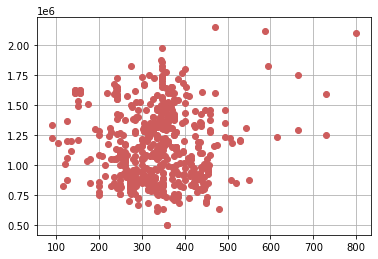

In [93]:
sj_th[['HOA/MONTH','PRICE']]
plt.plot(sj_th['HOA/MONTH'],sj_th['PRICE'], 'go', color = 'indianred')
plt.grid()

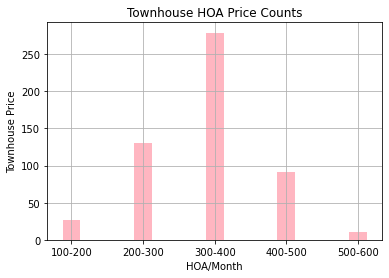

In [94]:
# The most frequent HOA price is between 300-400/months.
hoa=["100-200", '200-300', '300-400', '400-500', '500-600']
hoa1=sj_th[(sj_th['HOA/MONTH'] >= 100) & (sj_th['HOA/MONTH'] < 200)]['HOA/MONTH'].count()
hoa2=sj_th[(sj_th['HOA/MONTH'] >= 200) & (sj_th['HOA/MONTH'] < 300)]['HOA/MONTH'].count()
hoa3=sj_th[(sj_th['HOA/MONTH'] >= 300) & (sj_th['HOA/MONTH'] < 400)]['HOA/MONTH'].count()
hoa4=sj_th[(sj_th['HOA/MONTH'] >= 400) & (sj_th['HOA/MONTH'] < 500)]['HOA/MONTH'].count()
hoa5=sj_th[(sj_th['HOA/MONTH'] >= 500) & (sj_th['HOA/MONTH'] < 600)]['HOA/MONTH'].count()
hoa_price=[hoa1, hoa2, hoa3, hoa4, hoa5]
plt.bar(hoa,hoa_price, color = 'lightpink', width=0.25)
plt.title('Townhouse HOA Price Counts')
plt.xlabel('HOA/Month')
plt.ylabel('Townhouse Price')
plt.grid()

For HOA fees, we mainly consider townhouses. To begin with, the full name of HOA is Homeowner Association. It is an organization that enforces rules and regulations for the properties and residents. Owners have to pay a monthly fee from the day they purchase the property. HOA covers city services, insurance, lawn care, pest control, maintenance and repairs for common areas and more.
No need to mow the lawn or maintain a yard is great, but HOA fees can be pretty expensive. In this chart, some homeowners need to pay as high as 500 to 600 dollars for a month. 

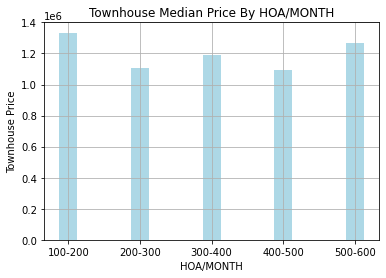

In [95]:
# The relationship between HOA and housing price
hoa=["100-200", '200-300', '300-400', '400-500', '500-600']
hoa1=sj_th[(sj_th['HOA/MONTH'] >= 100) & (sj_th['HOA/MONTH'] < 200)]['PRICE'].mean()
hoa2=sj_th[(sj_th['HOA/MONTH'] >= 200) & (sj_th['HOA/MONTH'] < 300)]['PRICE'].mean()
hoa3=sj_th[(sj_th['HOA/MONTH'] >= 300) & (sj_th['HOA/MONTH'] < 400)]['PRICE'].mean()
hoa4=sj_th[(sj_th['HOA/MONTH'] >= 400) & (sj_th['HOA/MONTH'] < 500)]['PRICE'].mean()
hoa5=sj_th[(sj_th['HOA/MONTH'] >= 500) & (sj_th['HOA/MONTH'] < 600)]['PRICE'].mean()
hoa_price=[hoa1, hoa2, hoa3, hoa4, hoa5]
plt.bar(hoa,hoa_price, color = 'lightblue', width=0.25)
plt.title('Townhouse Median Price By HOA/MONTH')
plt.xlabel('HOA/MONTH')
plt.ylabel('Townhouse Price')
plt.grid()

Conclusion

The data shows the relationship between housing price with its attributs. Besides that, we also find out that housing price has been going up since COVID. Transportation doesn't have preference now. What's more, the relationship of yard with price is not obvious. 